In [1]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
pos = np.loadtxt('./data/TracingTheCosmicWeb_PublicData/fof_catalog_200Mpc512.txt', skiprows=3)
N_real = len(pos)
pos = pos[:N_real,[1,2,3]]

In [3]:
ids = np.loadtxt('./data/pos_real.BSKIndex', dtype=int)

In [4]:
# List of connections ids
a = ids[:,0]
b = ids[:,1]

In [60]:
%%time

# Compute the number of connections and the average lenght
ID = np.zeros(N_real, dtype=int)
n_connections = np.zeros(N_real, dtype=int)
connections   = np.zeros(N_real, dtype=object)
av_length_connections = np.zeros(N_real, dtype=float)
pseudo_density = np.zeros(N_real, dtype=float)

distance_pairs =np.sum( (pos[a] - pos[b])**2, axis=1 )

pbar = tqdm(total=N_real)
for n in range(1000):#N_real):
    kx = a[b==n]
    ky = b[a==n]
    
    ID[n] = n
    n_connections[n]         = len(kx)+len(ky)
    connections[n]           = np.concatenate([kx,ky])
    av_length_connections[n] = np.sum(distance_pairs[connections[n]])/n_connections[n]
    
    # Defining the Inertial tensor from

    # TODO  remoe repeats
    Ixx = np.sum( (pos[:,1][connections[n]] - pos[:,1][n])**2  + (pos[:,2][connections[n]] - pos[:,2][n])**2 )
    Iyy = np.sum( (pos[:,2][connections[n]] - pos[:,2][n])**2  + (pos[:,0][connections[n]] - pos[:,0][n])**2 )
    Izz = np.sum( (pos[:,0][connections[n]] - pos[:,0][n])**2  + (pos[:,1][connections[n]] - pos[:,1][n])**2 )
    Ixy = np.sum( (pos[:,0][connections[n]] - pos[:,0][n])*(pos[:,1][connections[n]] - pos[:,1][n]) )  
    Iyz = np.sum( (pos[:,1][connections[n]] - pos[:,1][n])*(pos[:,2][connections[n]] - pos[:,2][n]) )
    Ixz = np.sum( (pos[:,0][connections[n]] - pos[:,0][n])*(pos[:,2][connections[n]] - pos[:,2][n]) )
    
    # Coumputing the Inertial tensor eigenvalues
    A = np.array([[Ixx,Ixy,Ixz],[Ixy,Iyy,Iyz],[Ixz,Iyz,Izz]])
    eigenvalues, eigenvectors= np.linalg.eig(A)
    eigenvalues[(eigenvalues<=0)] = 0.0001
    pseudo_density[n]           = np.log( 1/( np.sqrt(eigenvalues[0]).real * np.sqrt(eigenvalues[1]).real * np.sqrt(eigenvalues[2]).real  ) )
    
    pbar.update()

  0%|          | 0/281465 [00:00<?, ?it/s]

<timed exec>:18: RuntimeWarning: invalid value encountered in double_scalars


CPU times: user 2 s, sys: 11.8 ms, total: 2.01 s
Wall time: 2 s


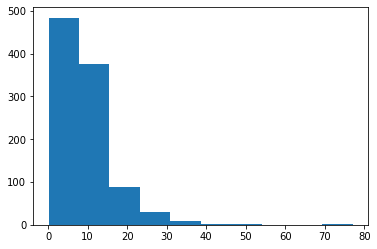

In [61]:
_ = plt.hist(av_length_connections[:1000])

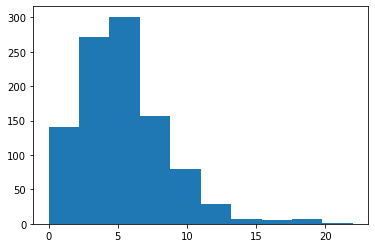

In [62]:
_ = plt.hist(n_connections[:1000])

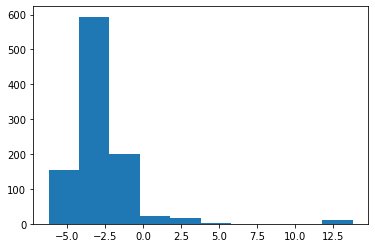

In [63]:
_ = plt.hist( pseudo_density[:1000] )

In [65]:
n_connections[pseudo_density>10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])